In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
import os

Populating the interactive namespace from numpy and matplotlib


/home/jngaravito57/Documents/codes/ipython/IPython/kernel/__init__.py:10: UserWarning: The `IPython.kernel` package has been deprecated. You should import from ipython_kernel or jupyter_client instead.
  warn("The `IPython.kernel` package has been deprecated. "


In [34]:
data = loadtxt("../../data/Illustris/Illustris_group_1.dat")
!head ../../data/Illustris/Illustris_group_1.dat
x = data[:,1]
y = data[:,2]
z = data[:,3]
Mag = data[:,8]
index = np.where(Mag<-8)
index = index[0]
x_st = x[index1]
y_st = y[index1]
z_st = z[index1]
print "-------------------------------------------"
print "DM particles = ", len(x_dm)
print "St particles = ", len(x_st)
print "-------------------------------------------"

#subID	 x	 y	 z	 vx	 yv	 yz	 vmax	 B_MAG
#subID	 kpc/h	 kpc/h	 kpc/h	 km/s	 km/s	 km/s	 km/s	 mags
363113 9135.142578 61494.183594 34818.050781 -75.025970 -103.862343 155.044128 183.771240 -2.164216e+01
363114 9111.817383 62023.890625 34675.218750 -41.810921 -223.350540 152.628281 203.263306 -2.065729e+01
363115 9328.059570 61322.406250 34768.777344 -113.065094 -161.372772 126.655479 103.421494 -1.920271e+01
363116 9248.898438 62146.527344 34552.589844 -173.067108 -290.183289 62.227917 81.910271 -1.775729e+01
363117 9034.386719 61466.765625 34737.417969 -3.381308 -184.282242 25.413532 70.085403 -1.733429e+01
363118 9138.362305 61942.945312 34637.523438 -45.721092 -58.925777 56.860920 71.778625 -1.659721e+01
363119 9044.320312 61451.789062 34865.535156 -21.678198 37.051926 190.498688 57.622360 -1.593198e+01
363120 8969.599609 61737.640625 34777.605469 1.009598 -213.725128 195.186966 57.876957 -1.513712e+01
-------------------------------------------
DM particles =  683
St particles =  4

1056


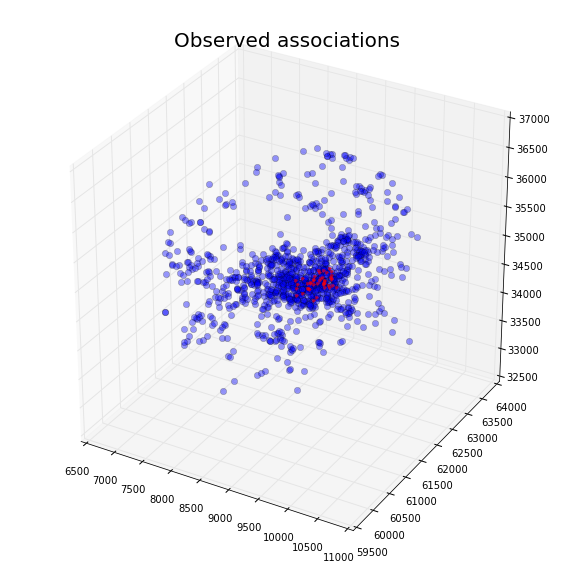

In [29]:
print len(x)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
title("Observed associations", fontsize=20)
plot(x, y, z, ls='*', marker='o', alpha=0.4)
plot(x_st, y_st, z_st, ls='*', marker='.', alpha=0.6, c='r')

In [30]:
f = open("Illustris-associtations.dat", "w")
f.write("%d\n"%683) #points in total 
f.write("%d\n"%683) #points in 'DM'
f.write("0\n") #gas
f.write("%d\n"%0) #stars
f.write("0.01\n") # time
f.write("0\n") # nactive
for i in range(len(x)):
    f.write(("%f \t %f \t %f  \n")%(x[i], y[i], z[i]))
f.close()

f1 = open("Illustris-associtations-stars.dat", "w")
f1.write("%d\n"%42) #points in total 
f1.write("%d\n"%42) #points in 'DM'
f1.write("0\n") #gas
f1.write("%d\n"%0) #stars
f1.write("0.01\n") # time
f1.write("0\n") # nactive
for i in range(len(x_st)):
    f1.write(("%f \t %f \t %f  \n")%(x_st[i], y_st[i], z_st[i]))
f1.close()


In [31]:
os.system(('./../../../HackFOF/src/fof -e %f -m 2 < Illustris-associtations.dat')%(724*0.7)) # check this linking length
fof_groups = loadtxt('fof.grp', skiprows=1)
print "Associations found = ", len(list(set(fof_groups)))

os.system(('./../../../HackFOF/src/fof -e %f -m 2 < Illustris-associtations-stars.dat')%(724*0.7)) # check this linking length
fof_groups_stars = loadtxt('fof.grp', skiprows=1)
print "Associations found = ", len(list(set(fof_groups_stars)))

Associations found =  6
Associations found =  1


Number of members in group 0 = 12
Number of members in group 1 = 655
Number of members in group 2 = 2
Number of members in group 3 = 18
Number of members in group 4 = 2
Number of members in group 5 = 6
Number of members in group 6 = 2
Number of members in group 7 = 2
Number of members in group 8 = 4
Number of members in group 9 = 14
Number of members in group 10 = 6
Number of members in group 11 = 2
Number of members in group 12 = 0


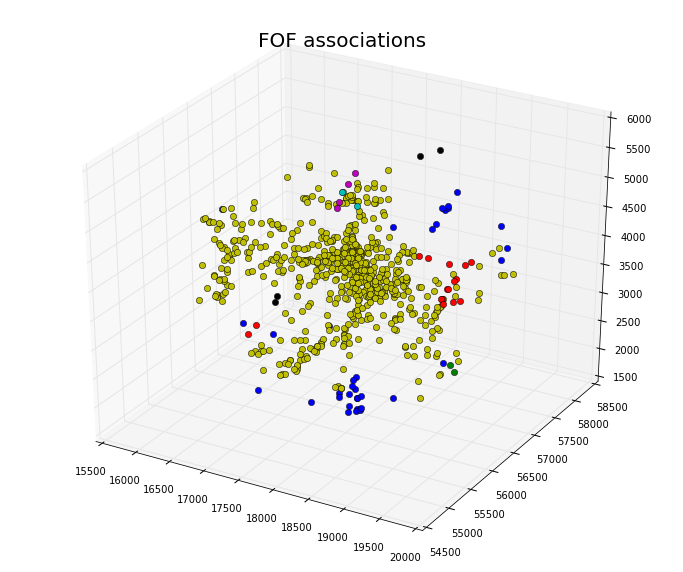

In [20]:
id_a = loadtxt("fof.grp", skiprows=1)
c = ["r", "b", "g", "y", "k", "c", "m", "r", "b", "k", "b", "y"]
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
title("FOF associations", fontsize=20)

plot(x, y, z, ls='*', marker='o', ms=2, c='k', alpha=0.4)
plot(x_st, y_st, z_st, ls='*', marker='o',  c='r', alpha=0.5, ms=4)
for i in range(0,13):
    index = where(id_a==i)
    index = index[0]
    x_a = x[index]
    y_a = y[index]
    z_a = z[index]
    print "Number of members in group", i, "=", len(x_a)
    plot(x_a, y_a, z_a, c=c[i-2],  ls='*', marker='o')